In [25]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/kaggle/input/bank-note-authentication-uci-data/BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

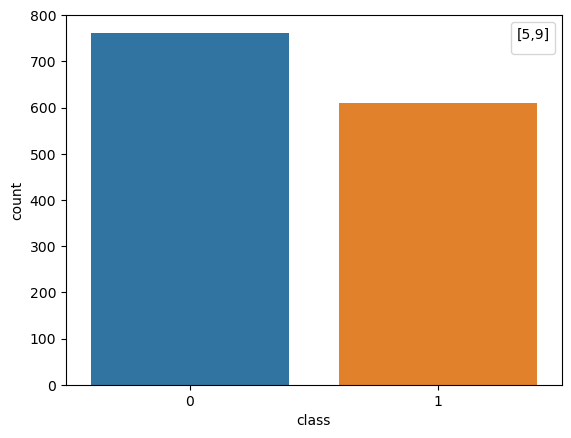

In [6]:
ax = sns.countplot(data=df, x= 'class')
ax.legend(title='[5,9]')

In [7]:

px.scatter_3d(df, x="variance", y="skewness", z ="curtosis",color=df["class"].astype(str) )

Text(0.5, 1, 'Pariwise relationship in data, [5,9]')

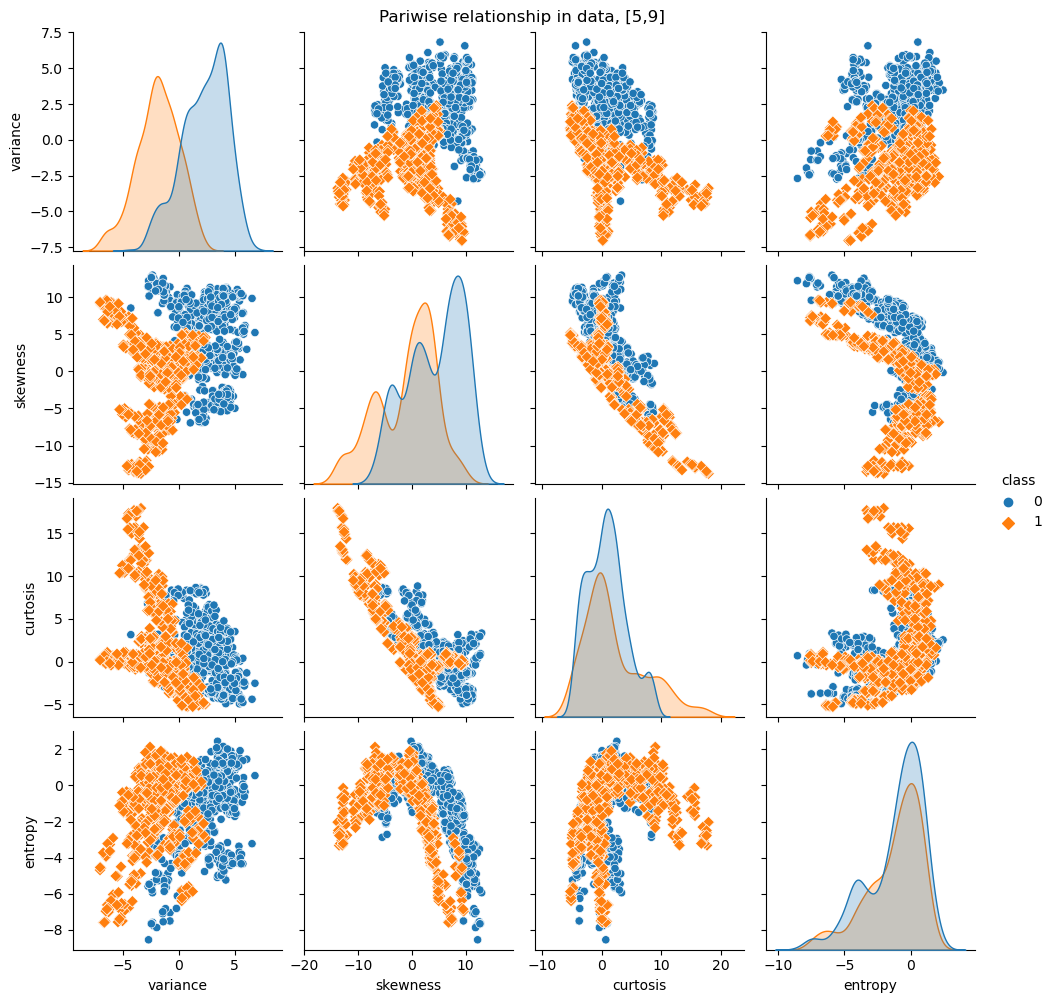

In [8]:
ax=sns.pairplot(df, hue= "class",markers=["o", "D"])
ax.fig.suptitle('Pariwise relationship in data, [5,9]', y = 1)

In [9]:
clf = tree.DecisionTreeClassifier()

In [10]:
X, Y = df.iloc[:,:4], df.iloc[:,4] 

In [11]:
x_train, x_test,y_train, y_test = train_test_split(X,Y)

In [12]:
x_train.head()

,variance,skewness,curtosis,entropy
1226,-4.0679,2.4955,0.79571,-1.1039
267,3.8496,9.7939,-4.15080,-4.4582
419,1.9572,-5.1153,8.61270,-1.4297
263,4.9880,7.2052,-3.28460,-1.1608
570,3.9382,0.9291,0.78543,0.6767


In [13]:
clf = clf.fit(x_train, y_train)

In [14]:
output = clf.predict(x_test)

In [15]:
report = classification_report(y_test, output)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       186
           1       0.99      0.99      0.99       157

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [16]:
matrix = confusion_matrix(y_test, output)

In [17]:
print(matrix)

[[185   1]
 [  1 156]]


Text(50.722222222222214, 0.5, 'Actual')

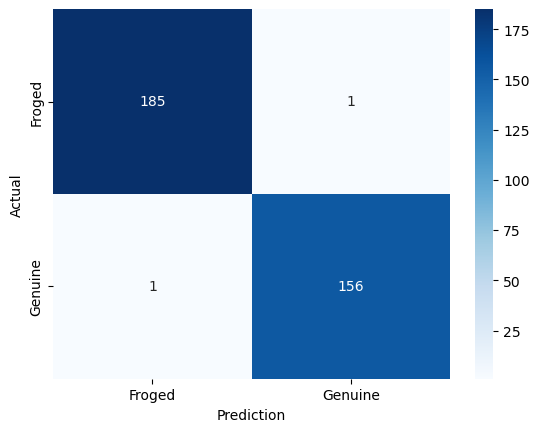

In [18]:
classes = ['Froged', 'Genuine']

fig =sns.heatmap(matrix, cmap= 'Blues' , fmt='g', annot=True, xticklabels=classes, yticklabels=classes)
fig.set_xlabel('Prediction')
fig.set_ylabel('Actual')


<Figure size 640x480 with 0 Axes>

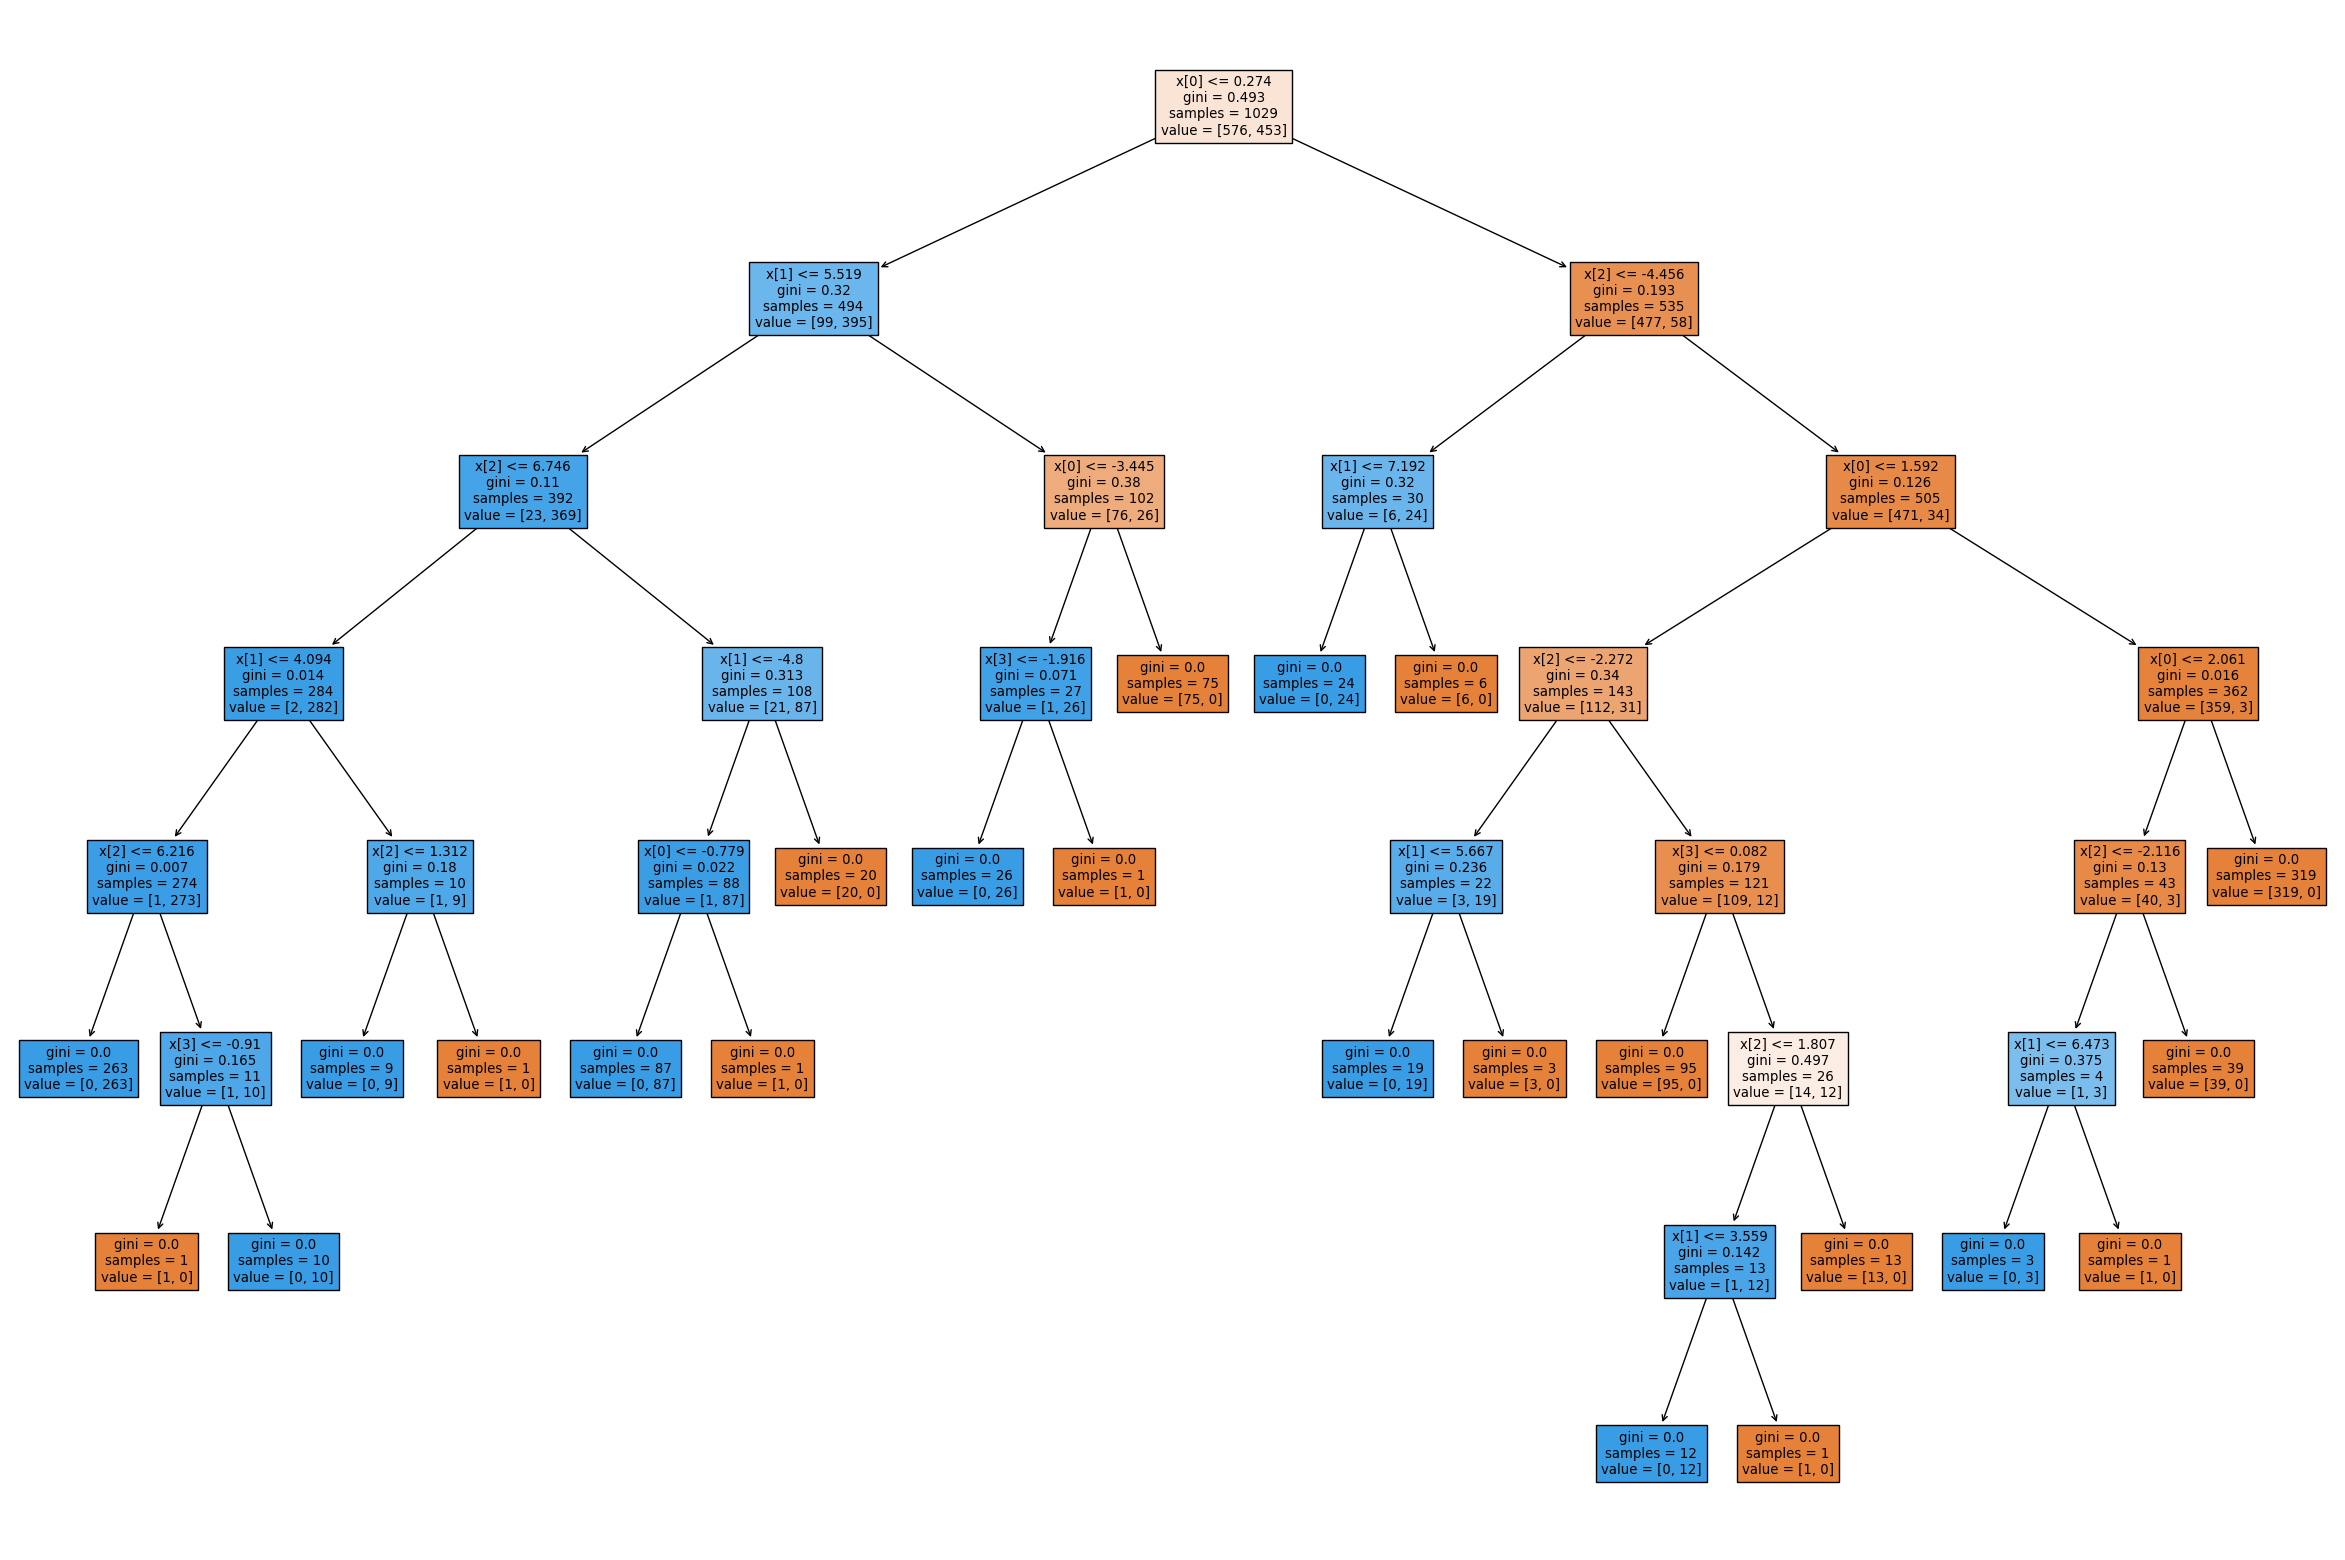

In [19]:
plt.figure()
plt.figure(figsize=(30,20))
tree.plot_tree(clf, filled = True)
plt.show()


In [20]:
clf_e = tree.DecisionTreeClassifier(criterion ="entropy")

In [21]:
clf_e.fit(x_train, y_train)
output = clf_e.predict(x_test)
report = classification_report(y_test, output)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.97      0.98      0.98       157

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [22]:
matrix = confusion_matrix(y_test, output)
print(matrix)

[[182   4]
 [  3 154]]


Text(50.722222222222214, 0.5, 'Actual')

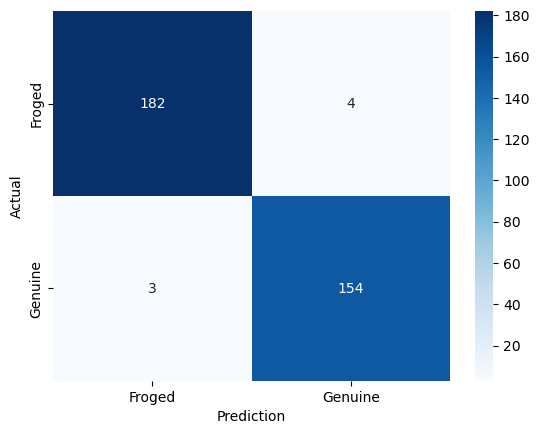

In [23]:
classes = ['Froged', 'Genuine']

fig =sns.heatmap(matrix, cmap= 'Blues' , fmt='g', annot=True, xticklabels=classes, yticklabels=classes)
fig.set_xlabel('Prediction')
fig.set_ylabel('Actual')


<Figure size 640x480 with 0 Axes>

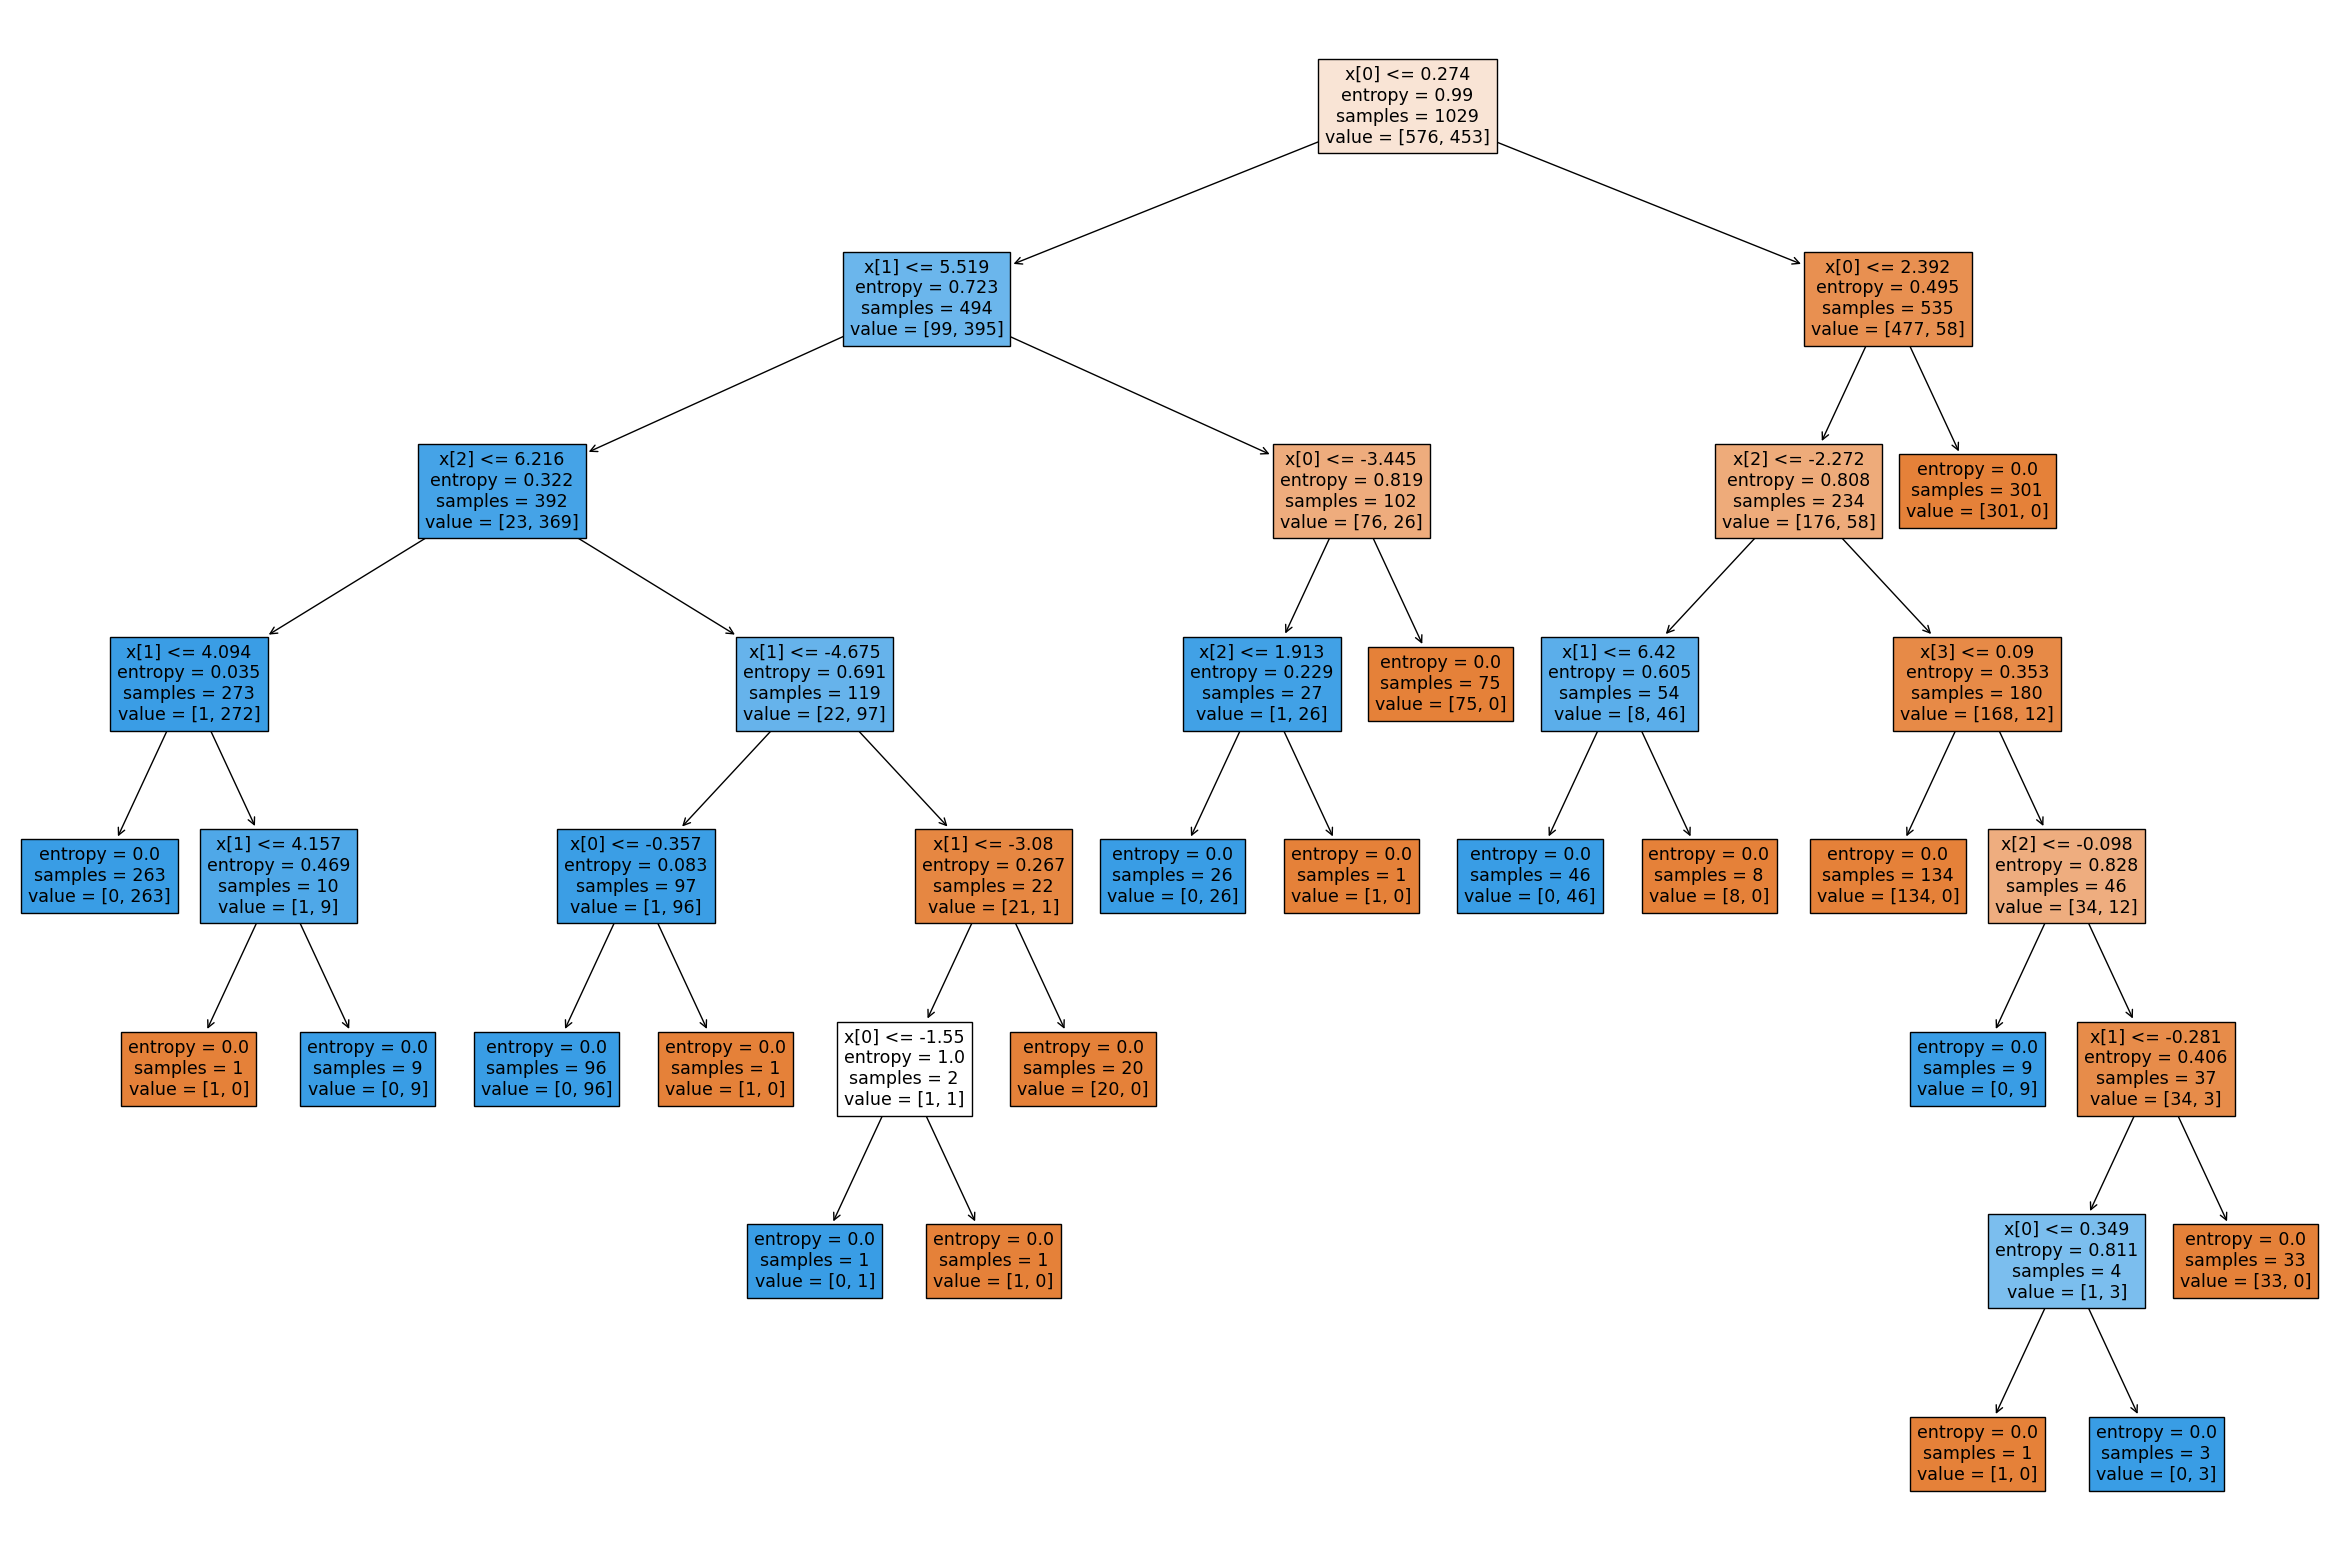

In [24]:
plt.figure()
plt.figure(figsize=(30,20))
tree.plot_tree(clf_e, filled = True)
plt.show()